## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.2, 0.3, 0.4, 0.5]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drop_ratio in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-dropout-%s" % str(drop_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0728 13:59:31.507824 4480738752 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 13:59:31.519593 4480738752 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 13:59:31.522034 4480738752 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0728 13:59:31.533112 4480738752 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is d

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

50000/50000 [==============================] - 13s 268us/step - loss: 1.0285 - acc: 0.6320 - val_loss: 1.2805 - val_acc: 0.5543
Epoch 48/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.0148 - acc: 0.6374 - val_loss: 1.3062 - val_acc: 0.5474
Epoch 49/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.0060 - acc: 0.6402 - val_loss: 1.3220 - val_acc: 0.5461
Epoch 50/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.9930 - acc: 0.6452 - val_loss: 1.2713 - val_acc: 0.5574
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0

50000/50000 [==============================] - 14s 284us/step - loss: 1.2312 - acc: 0.5593 - val_loss: 1.3151 - val_acc: 0.5323
Epoch 44/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.2242 - acc: 0.5609 - val_loss: 1.3000 - val_acc: 0.5381
Epoch 45/50
50000/50000 [==============================] - 15s 297us/step - loss: 1.2175 - acc: 0.5641 - val_loss: 1.2990 - val_acc: 0.5389
Epoch 46/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.2057 - acc: 0.5669 - val_loss: 1.3005 - val_acc: 0.5410
Epoch 47/50
50000/50000 [==============================] - 14s 290us/step - loss: 1.1975 - acc: 0.5726 - val_loss: 1.2870 - val_acc: 0.5421
Epoch 48/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.1890 - acc: 0.5728 - val_loss: 1.2950 - val_acc: 0.5416
Epoch 49/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.1803 - acc: 0.5769 - val_loss: 1.3069 - val_acc: 0.5367
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 14s 286us/step - loss: 1.3884 - acc: 0.5048 - val_loss: 1.3529 - val_acc: 0.5120
Epoch 40/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.3831 - acc: 0.5038 - val_loss: 1.3729 - val_acc: 0.5081
Epoch 41/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.3690 - acc: 0.5076 - val_loss: 1.3566 - val_acc: 0.5141
Epoch 42/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.3722 - acc: 0.5095 - val_loss: 1.3385 - val_acc: 0.5222
Epoch 43/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.3586 - acc: 0.5126 - val_loss: 1.3427 - val_acc: 0.5145
Epoch 44/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.3505 - acc: 0.5179 - val_loss: 1.3310 - val_acc: 0.5218
Epoch 45/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.3468 - acc: 0.5155 - val_loss: 1.3408 - val_acc: 0.5188
Epoch 46/50
50000/50000 [=======

50000/50000 [==============================] - 14s 282us/step - loss: 1.5404 - acc: 0.4471 - val_loss: 1.4496 - val_acc: 0.4781
Epoch 36/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.5309 - acc: 0.4499 - val_loss: 1.4508 - val_acc: 0.4753
Epoch 37/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.5270 - acc: 0.4534 - val_loss: 1.4342 - val_acc: 0.4828
Epoch 38/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.5197 - acc: 0.4516 - val_loss: 1.4259 - val_acc: 0.4852
Epoch 39/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.5151 - acc: 0.4554 - val_loss: 1.4260 - val_acc: 0.4850
Epoch 40/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.5084 - acc: 0.4567 - val_loss: 1.4422 - val_acc: 0.4834
Epoch 41/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.5013 - acc: 0.4613 - val_loss: 1.4303 - val_acc: 0.4876
Epoch 42/50
50000/50000 [=======

50000/50000 [==============================] - 14s 286us/step - loss: 1.7062 - acc: 0.3789 - val_loss: 1.5862 - val_acc: 0.4323
Epoch 32/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.7069 - acc: 0.3807 - val_loss: 1.5723 - val_acc: 0.4365
Epoch 33/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.6948 - acc: 0.3848 - val_loss: 1.5657 - val_acc: 0.4339
Epoch 34/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.6896 - acc: 0.3872 - val_loss: 1.5643 - val_acc: 0.4380
Epoch 35/50
50000/50000 [==============================] - 16s 312us/step - loss: 1.6817 - acc: 0.3879 - val_loss: 1.5629 - val_acc: 0.4364
Epoch 36/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.6733 - acc: 0.3928 - val_loss: 1.5499 - val_acc: 0.4443
Epoch 37/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.6727 - acc: 0.3922 - val_loss: 1.5630 - val_acc: 0.4385
Epoch 38/50
50000/50000 [=======

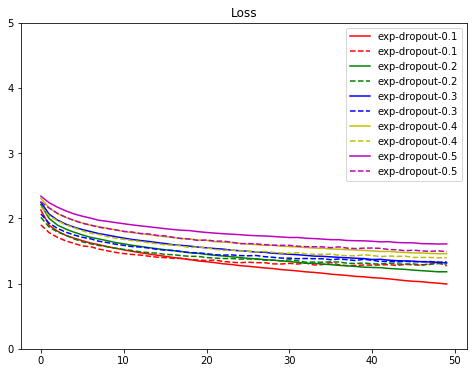

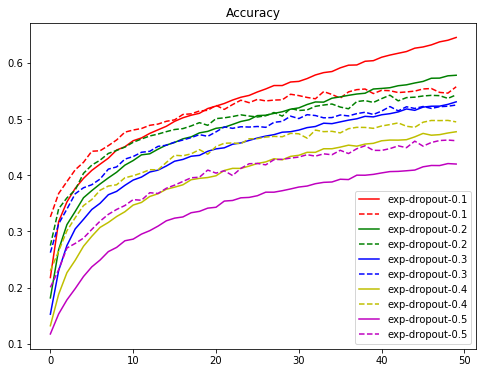

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()